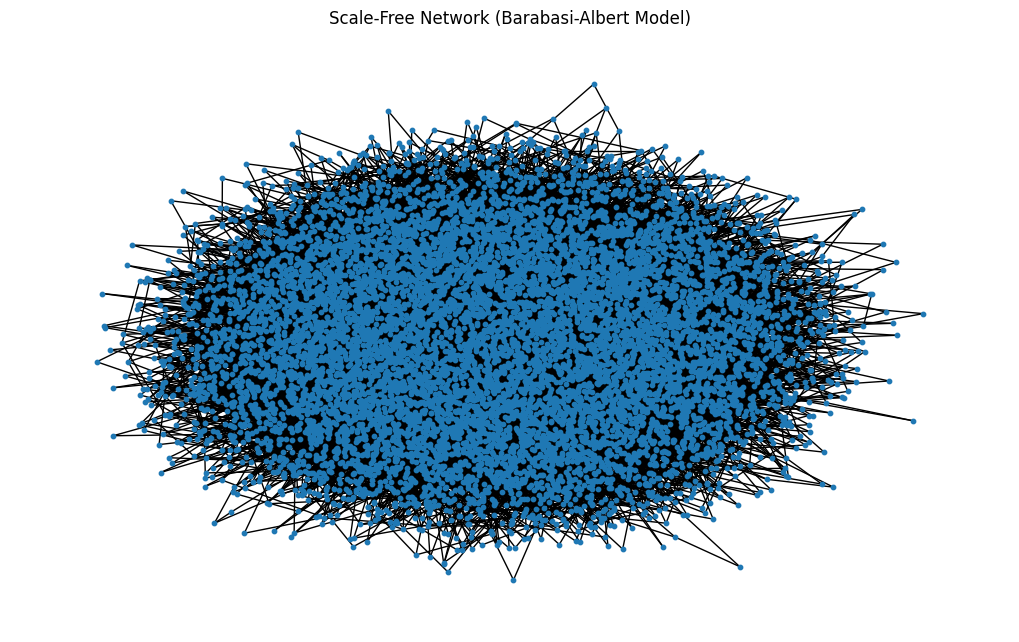

Number of nodes: 10000
Number of edges: 19997


In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def barabasi_albert(n, m):
    # Initialize a Graph with m initial nodes
    G = nx.complete_graph(m)

    # Initialize a list to store degrees of nodes
    degrees = [m - 1] * m

    # Add nodes incrementally
    for i in range(m, n):
        # Calculate the probabilities for preferential attachment
        total_degree = sum(degrees)
        probs = [degree / total_degree if total_degree > 0 else 1 / m for degree in degrees]

        # Select m existing nodes based on preferential attachment
        selected = np.random.choice(G.nodes(), size=m, replace=False, p=probs)

        # Add the new node
        G.add_node(i)

        # Connect the new node to the selected existing nodes
        for node in selected:
            G.add_edge(i, node)
            degrees[node] += 1
        degrees.append(m)  # New node has m connections

    return G

# Function to display the graph
def display_graph(G):
    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=False, node_size=10)
    plt.title("Scale-Free Network (Barabasi-Albert Model)")
    plt.show()

# Generate a scale-free network with 10,000 nodes and m=2
scale_free_network = barabasi_albert(10000, 2)

# Display the graph
display_graph(scale_free_network)

# Print the number of nodes and edges
num_nodes = scale_free_network.number_of_nodes()
num_edges = scale_free_network.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Maximum Degree: 214
Minimum Degree: 2
Average Degree: 3.9994
Standard Deviation of Degree Distribution: 6.2855071108065745


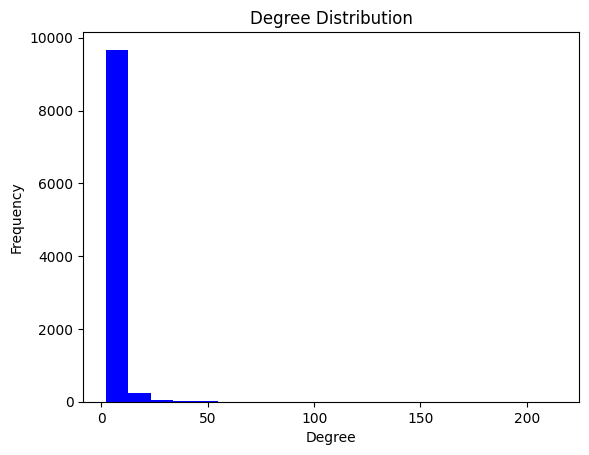

In [7]:
G = scale_free_network

degrees = dict(G.degree())
degree_values = list(degrees.values())

# Calculate maximum degree
max_degree = max(degree_values)

# Calculate minimum degree
min_degree = min(degree_values)

# Calculate average degree
avg_degree = np.mean(degree_values)

# Calculate standard deviation of the degree distribution
std_dev_degree = np.std(degree_values)

print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree Distribution:", std_dev_degree)

# Visualize the degree distribution (histogram)
plt.hist(degree_values, bins=20, color='blue')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [10]:
import pandas as pd

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate average degree centrality
avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
print("Average Degree Centrality:", avg_degree_centrality)

# Find the top 10 nodes with highest degree centrality
print("\nThe nodes with the highest degree centrality\n")
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Degree Centrality'])
print(df)

Average Degree Centrality: 0.0003999799979997152

The nodes with the highest degree centrality

   Node  Degree Centrality
0     0           0.021402
1     3           0.021302
2     2           0.016502
3    33           0.015902
4     5           0.011901
5     4           0.011201
6     1           0.010701
7     7           0.010101
8    36           0.010001
9    12           0.009801


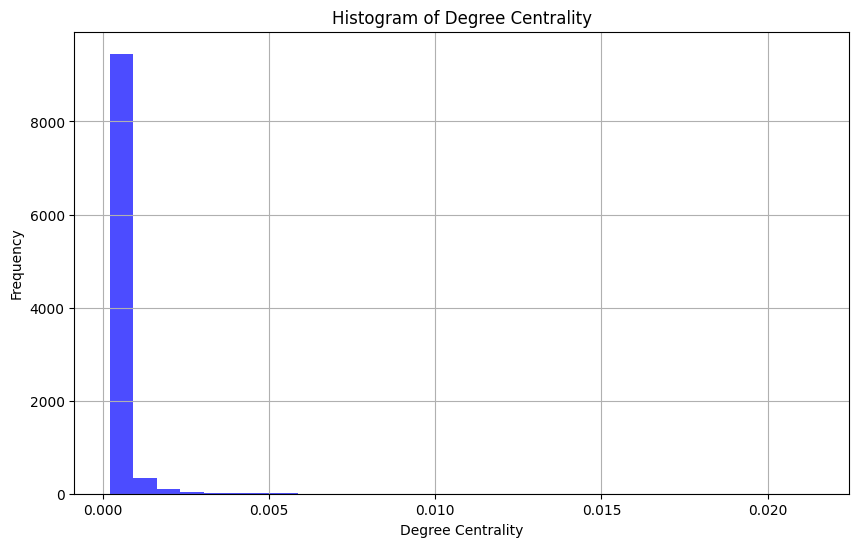

In [11]:
#HISTOGRAM FOR THE COMPLETE NETWORK

plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Degree Centrality')
plt.grid(True)
plt.show()

In [12]:
print(max(degree_values))


# Step 3: Find the node with the maximum degree
max_degree_node = max(degrees, key=degrees.get)
max_degree = degrees[max_degree_node]

print("Node with Maximum Degree:", max_degree_node)
print("Degree:", max_degree)

214
Node with Maximum Degree: 0
Degree: 214


In [13]:
eigenvector_centrality = nx.eigenvector_centrality(G)

avg_eigenvector_centrality = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
print("Average Eigenvector Centrality:", avg_eigenvector_centrality)

top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 4: Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Eigenvector Centrality'])
print(df)

Average Eigenvector Centrality: 0.00316152571733275
   Node  Eigenvector Centrality
0     0                0.442549
1     3                0.436409
2     2                0.201995
3    33                0.171430
4     5                0.142236
5     1                0.106586
6     7                0.105506
7     4                0.102836
8    12                0.078946
9    32                0.074527


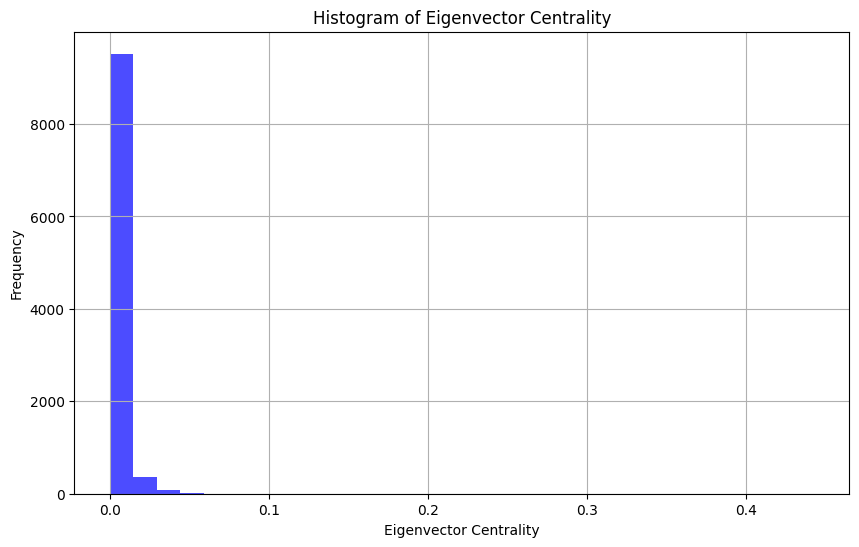

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Eigenvector Centrality')
plt.grid(True)
plt.show()

In [15]:
pagerank_centrality = nx.pagerank(G)

# Calculate average PageRank centrality
avg_pagerank_centrality = sum(pagerank_centrality.values()) / len(pagerank_centrality)

# Get the top 10 nodes with highest PageRank centrality
top_10_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'PageRank Centrality'])
print(df)

# Print the average PageRank centrality
print("Average PageRank Centrality:", avg_pagerank_centrality)

   Node  PageRank Centrality
0     0             0.004473
1     3             0.004467
2     2             0.003517
3    33             0.003391
4     5             0.002522
5     4             0.002376
6     1             0.002250
7    36             0.002144
8     7             0.002138
9    12             0.002060
Average PageRank Centrality: 0.00010000000000000026


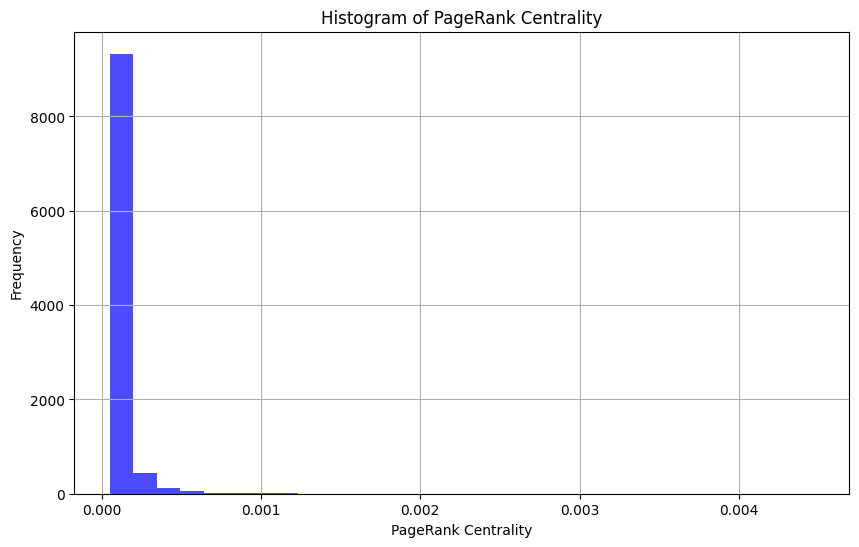

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(pagerank_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('PageRank Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of PageRank Centrality')
plt.grid(True)
plt.show()

In [17]:
alpha = 0.1  # Adjust the damping factor as needed
beta = 1 / (max(dict(G.degree()).values()) + 1)  # Normalize beta by the maximum degree in the graph
n = len(G)
I = np.identity(n)
A = nx.to_numpy_array(G)
katz_centrality = np.linalg.inv(I - alpha * A.T) @ np.ones(n) * beta

#  Get the top 10 nodes with highest Katz centrality
top_10_indices = np.argsort(katz_centrality)[::-1][:10]
top_10_nodes = [(list(G.nodes())[i], katz_centrality[i]) for i in top_10_indices]

# Display the top 10 nodes and their centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Katz Centrality'])
print(df)

   Node  Katz Centrality
0    16         0.473619
1     1         0.314580
2    12         0.312547
3    30         0.251153
4   114         0.213230
5     3         0.187935
6    76         0.133940
7    59         0.102158
8   107         0.101856
9   237         0.095396


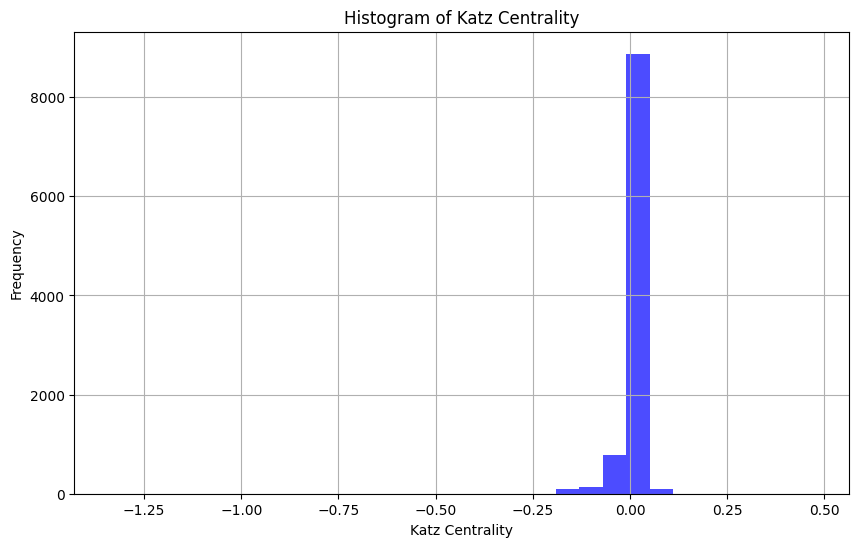

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality, bins=30, color='blue', alpha=0.7)
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Katz Centrality')
plt.grid(True)
plt.show()

In [19]:
global_clustering_coefficient = nx.average_clustering(G)

# Calculate the local clustering coefficients for all nodes
local_clustering_coefficients = nx.clustering(G)

# Calculate the average local clustering coefficient
average_local_clustering_coefficient = sum(local_clustering_coefficients.values()) / len(local_clustering_coefficients)

#  Display the global and average local clustering coefficients
print("Global Clustering Coefficient:", global_clustering_coefficient)
print("Average Local Clustering Coefficient:", average_local_clustering_coefficient)

#print("Local Clustering: ", local_clustering_coefficients)

highest_local_clustering_nodes = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:10]

#  Display the nodes and their local clustering coefficients in a tabular format
df = pd.DataFrame(highest_local_clustering_nodes, columns=['Node', 'Local Clustering Coefficient'])
print(df)

Global Clustering Coefficient: 0.0048024447777880435
Average Local Clustering Coefficient: 0.0048024447777880435
   Node  Local Clustering Coefficient
0  1138                           1.0
1  1685                           1.0
2  1782                           1.0
3  2118                           1.0
4  2134                           1.0
5  2224                           1.0
6  2385                           1.0
7  2581                           1.0
8  2801                           1.0
9  3116                           1.0


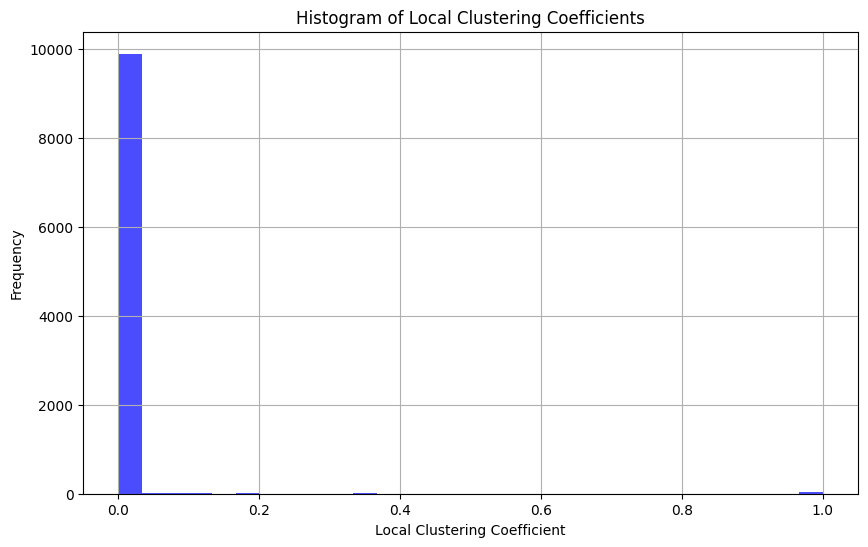

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(list(local_clustering_coefficients.values()), bins=30, color='blue', alpha=0.7)
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Local Clustering Coefficients')
plt.grid(True)
plt.show()

In [22]:
betweenness_centrality = nx.betweenness_centrality(G)

# Step 3: Get the top 10 nodes with the highest betweenness centrality
top_10_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#  Display the top 10 nodes and their betweenness centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Betweenness Centrality'])
print(df)

   Node  Betweenness Centrality
0     0                0.177285
1     3                0.173174
2     2                0.089113
3    33                0.078679
4     5                0.064642
5     1                0.056412
6     4                0.054695
7    21                0.052659
8    12                0.048351
9     7                0.048090


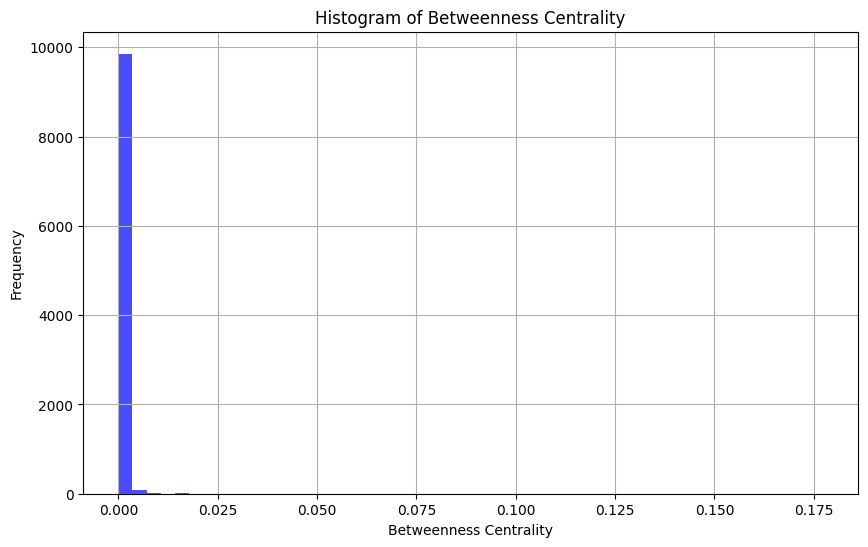

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.grid(True)
plt.show()

In [26]:
closeness_centrality = nx.closeness_centrality(G)

# Get the top 10 nodes with the highest closeness centrality
top_10_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes and their closeness centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Closeness Centrality'])
#print(closeness_centrality)
print(df)

   Node  Closeness Centrality
0     0              0.329239
1     3              0.328094
2     2              0.303718
3     5              0.301320
4    33              0.299201
5     1              0.296056
6     4              0.292300
7    21              0.291942
8     7              0.289549
9    12              0.288905


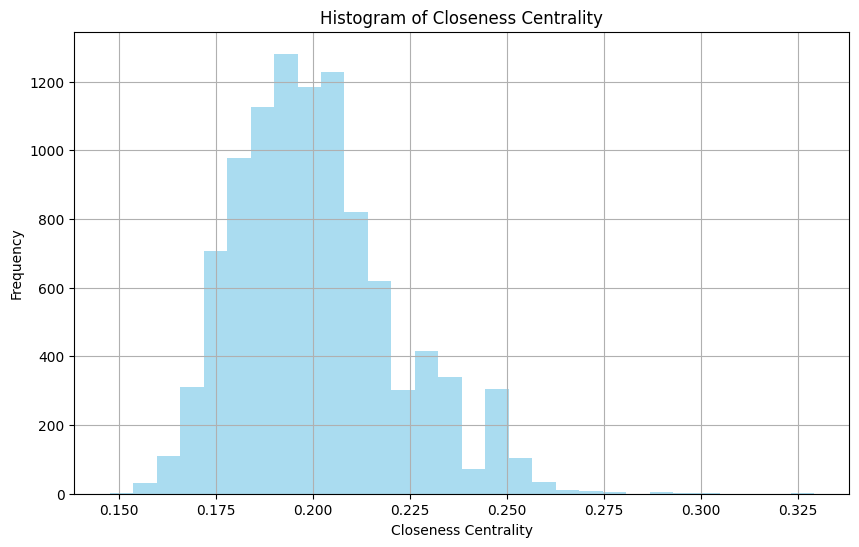

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Closeness Centrality')
plt.grid(True)
plt.show()

In [25]:
transitivity = nx.transitivity(G)

print("Transitivity:", transitivity)

Transitivity: 0.0017125083004228847


In [24]:
reciprocity = nx.reciprocity(G)

print("Reciprocity:", reciprocity)

Reciprocity: 0.0


In [30]:
# Function to find the giant component
def find_giant_component(G):
    # Get connected components
    components = sorted(nx.connected_components(G), key=len, reverse=True)

    # Return the largest component
    giant_component = components[0] if components else set()

    return giant_component

# Function to compute basic statistics
def compute_basic_statistics(G):
    # Number of nodes
    num_nodes = G.number_of_nodes()

    # Number of edges
    num_edges = G.number_of_edges()

    # Average degree
    avg_degree = sum(dict(G.degree()).values()) / num_nodes

    return num_nodes, num_edges, avg_degree

# Assuming G is your network
# Find the giant component
giant_component = find_giant_component(G)

# Compute basic statistics
num_nodes, num_edges, avg_degree = compute_basic_statistics(G)

# Print basic statistics
print("Basic Statistics:")
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", avg_degree)

# Print size of the giant component
print("Size of the Giant Component:", len(giant_component))

# Print the nodes of the giant component
# print("Nodes of the Giant Component:")
# print(giant_component)


Basic Statistics:
Number of nodes: 10000
Number of edges: 19997
Average degree: 3.9994
Size of the Giant Component: 10000


In [59]:
# Function to assign random activation probabilities to edges
def assign_activation_probabilities(G):
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        probs = np.random.rand(len(neighbors))
        sum_probs = sum(probs)
        normalized_probs = probs / sum_probs
        for i, neighbor in enumerate(neighbors):
            G.edges[node, neighbor]['probability'] = normalized_probs[i]

# Function to simulate Independent Cascade Model (ICM)
def icm_simulation(G, seed_node):
    activated_nodes = set([seed_node])
    newly_activated = set([seed_node])
    steps = 0
    while newly_activated:
        steps += 1
        newly_activated_next = set()
        for node in newly_activated:
            for neighbor in G.neighbors(node):
                if neighbor not in activated_nodes:
                    probability = G.edges[node, neighbor]['probability']
                    if np.random.rand() < probability:
                        activated_nodes.add(neighbor)
                        newly_activated_next.add(neighbor)
        newly_activated = newly_activated_next
    return steps, len(activated_nodes)

# Function to repeat simulation starting from different seed nodes
def repeat_simulation(G, num_trials):
    max_nodes_reached_list = []
    for _ in range(num_trials):
        seed_node = np.random.choice(list(G.nodes()))
        steps, max_nodes_reached = icm_simulation(G, seed_node)
        max_nodes_reached_list.append(max_nodes_reached)
    return max_nodes_reached_list


# Assign random activation probabilities to edges
assign_activation_probabilities(G)

# Repeat simulation 10 times starting from different seed nodes
num_trials = 10
max_nodes_reached_list = repeat_simulation(G, num_trials)

# Calculate average number of steps required
print(max_nodes_reached_list)
average_max_nodes_reached = np.mean(max_nodes_reached_list)
print("Average Maximum Number of Nodes Reached:", average_max_nodes_reached)


[4924, 4880, 4905, 6, 2, 1, 4856, 4844, 2, 5057]
Average Maximum Number of Nodes Reached: 2947.7
